# Let's explore EXFOR offerings for Pb208

In [1]:
import pickle
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools
import jitr

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
proton = (1, 1)
neutron = (1, 0)

In [4]:
target =(208, 82)

In [5]:
all_entries_pp = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

There was an error reading entry C1292, it will be skipped:
Missing 'Angle' field!
There was an error reading entry O0187, it will be skipped:
Missing 'Angle' field!
There was an error reading entry O0191, it will be skipped:
Missing 'Angle' field!


In [6]:
# these are considered outliers or not useful
entries_to_ignore = ['C2700', 'O0598', 'C1019', 'O0142', 'O0187', 'O0191', 'O0166', 'O0157',  'O0285', 'O0049']
for entry in entries_to_ignore:
    del all_entries_pp[entry]

In [7]:
all_entries_pp

{'C0893': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494dd97d0>,
 'E1201': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664946b14d0>,
 'E1846': <exfor_tools.exfor_tools.ExforDifferentialData at 0x76649450e450>,
 'O0032': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494343a90>,
 'O0208': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494c9e3d0>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494c16cd0>,
 'O0225': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494f84210>,
 'O0287': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766493e57250>,
 'O0391': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664947b8a10>,
 'T0101': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664946aecd0>}

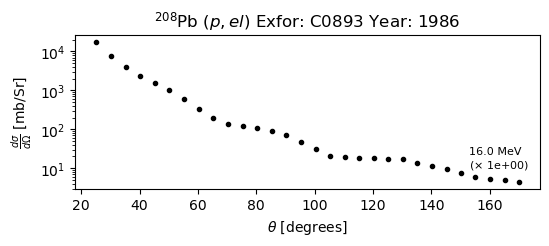

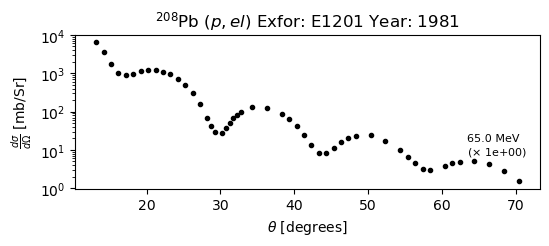

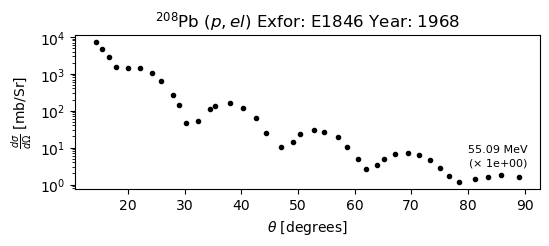

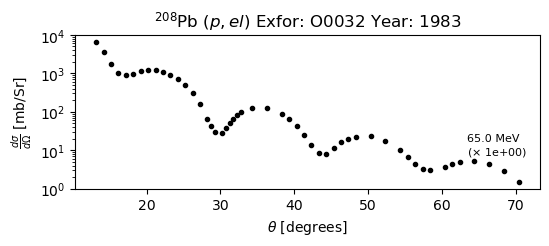

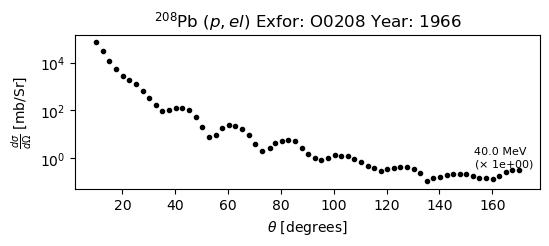

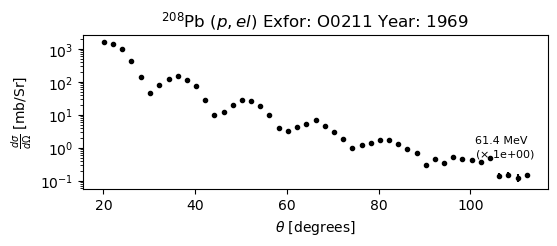

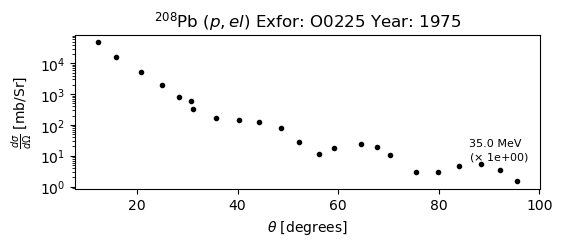

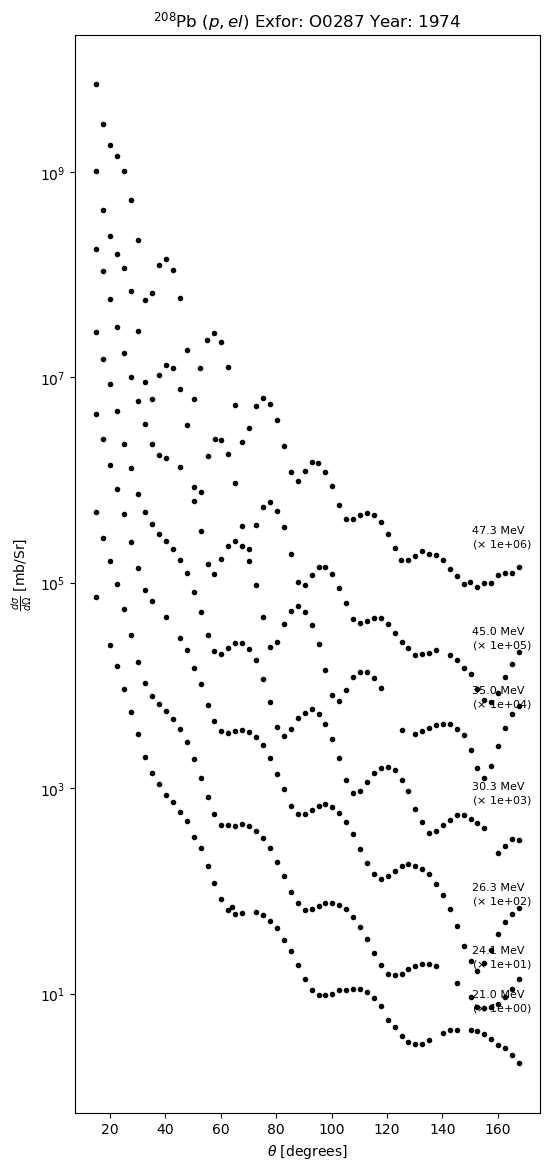

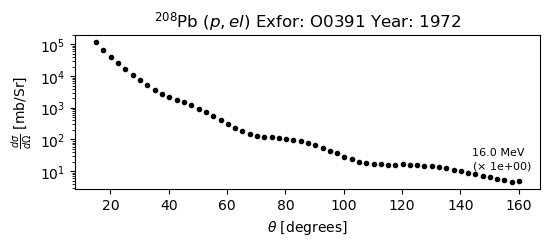

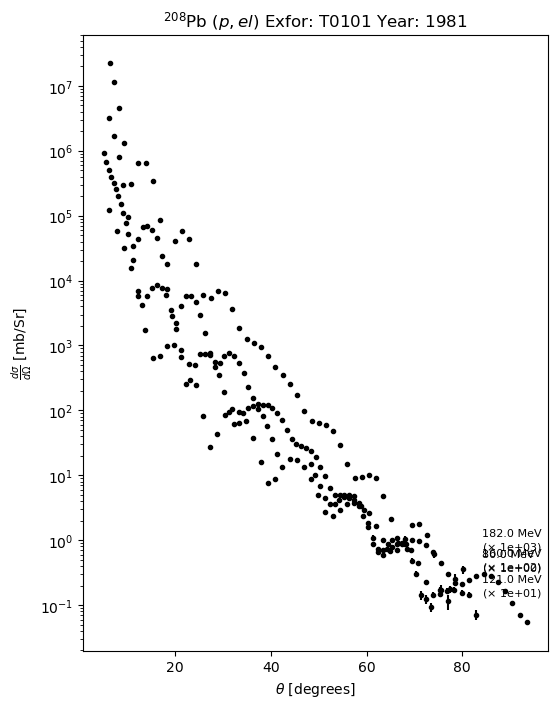

In [8]:
for entry, data in all_entries_pp.items():

    N = len(data.measurements)
    if N < 10:
        fig, ax = plt.subplots(1, 1, figsize=(6, 2 * N))
        data.plot_experiment(
            ax,
            xlim=None,
            offsets=10,
            label_energy_err=False,
            label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
        )
        yr = data.meta["year"]
        ax.set_title(f"{data.fancy_label} Exfor: {entry} Year: {yr}")
    else:
        N_plots = N // 10
        remaining = N % 10
        if remaining > 0:
            N_plots +=1
        for i in range(N_plots):
            fig, ax = plt.subplots(1, 1, figsize=(6, 20))
            data.plot_experiment(
                ax,
                data.measurements[i * N_plots: (i+1)*N_plots],
                xlim=None,
                offsets=10,
                label_energy_err=False,
                label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
            )
        yr = data.meta["year"]
        ax.set_title(f"{data.fancy_label} Exfor: {entry} Year: {yr}")

In [9]:
all_entries_pp_ruth = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 1),
    quantity="dXS/dRuth",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [10]:
all_entries_pp_ruth

{'C1019': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494e88050>,
 'O0211': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766493fd4510>,
 'O0287': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664946825d0>,
 'O0300': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664bb15ff50>,
 'O0302': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664bb198190>,
 'O0328': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494583a50>,
 'O0490': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766493618c50>,
 'O0552': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494cf20d0>,
 'O0788': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766493e64650>}

In [11]:
# these are considered outliers or not useful
entries_to_ignore = ['O0490','C1019']
for entry in entries_to_ignore:
    del all_entries_pp_ruth[entry]

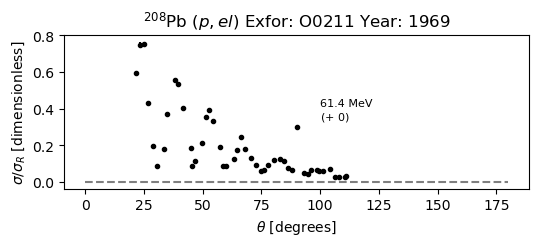

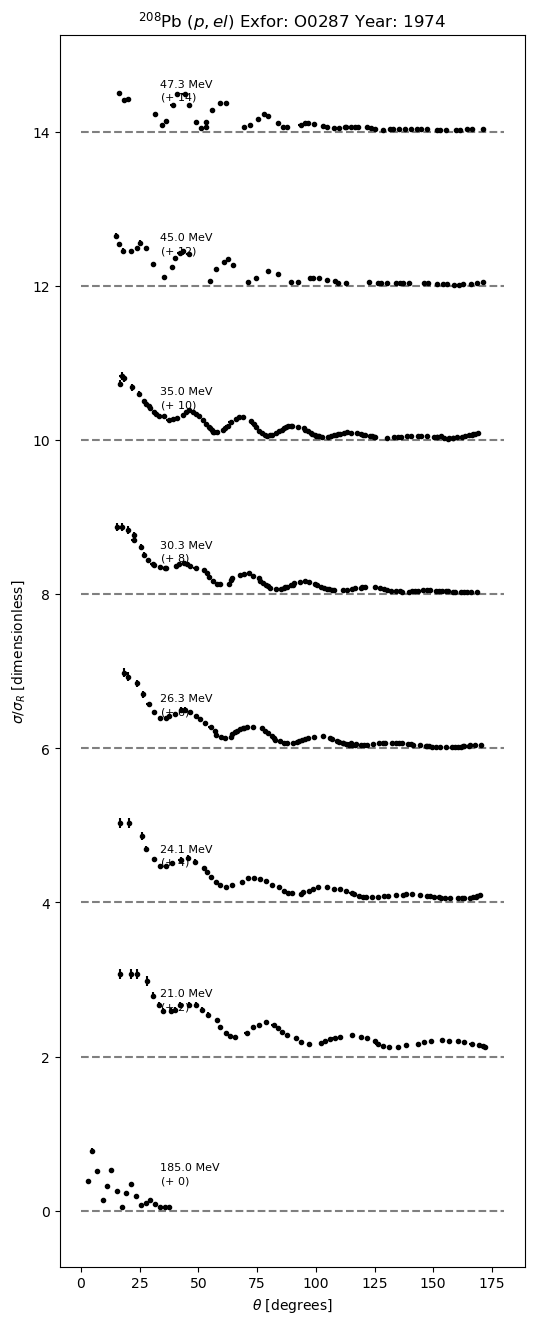

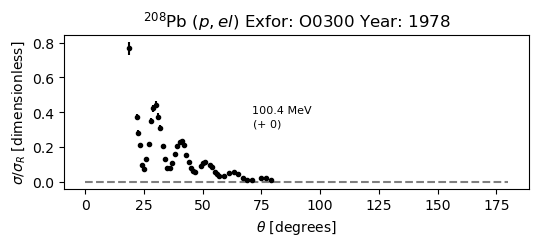

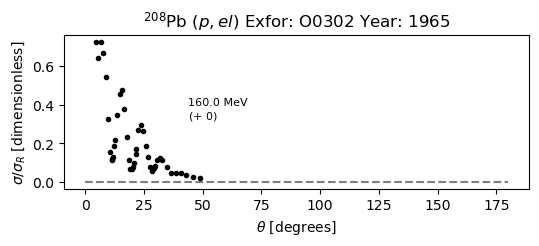

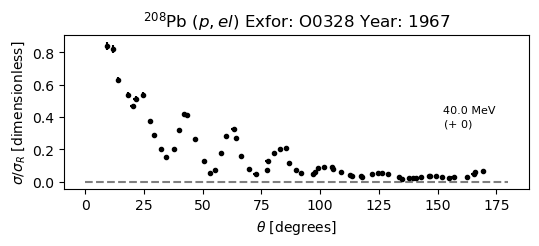

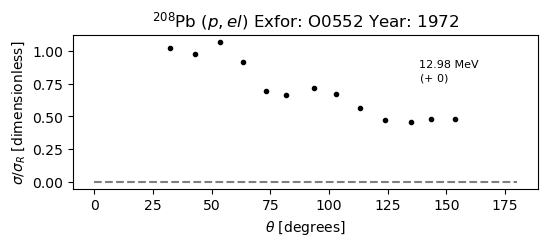

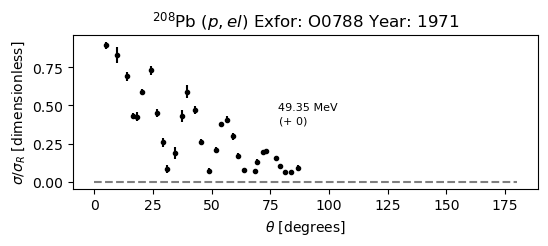

In [12]:
for entry, data in all_entries_pp_ruth.items():

    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 2 * N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=2,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0, :]) * 0.9,
        label_offset_factor=0.3,
        log=False,
        add_baseline=True,
    )
    yr = data.meta["year"]
    ax.set_title(f"{data.fancy_label} Exfor: {entry} Year: {yr}")

In [13]:
all_entries_nn = exfor_tools.get_exfor_differential_data(
    target=target,
    projectile=(1, 0),
    quantity="dXS/dA",
    product="EL",
    energy_range=[10, 200],  # MeV
)

In [14]:
all_entries_nn

{'10871': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664bb13d390>,
 '12701': <exfor_tools.exfor_tools.ExforDifferentialData at 0x76649379ea50>,
 '12865': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766494e82dd0>,
 '12935': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766493c889d0>,
 '13685': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664967bec10>,
 '13946': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664941aa350>,
 '14317': <exfor_tools.exfor_tools.ExforDifferentialData at 0x7664941a9a50>,
 '22847': <exfor_tools.exfor_tools.ExforDifferentialData at 0x76649427a490>,
 '22987': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766493e4dd10>,
 '23059': <exfor_tools.exfor_tools.ExforDifferentialData at 0x766493cfe610>,
 '40288': <exfor_tools.exfor_tools.ExforDifferentialData at 0x76649483f810>}

In [15]:
# these are considered outliers or not useful
entries_to_ignore = ['40288', '23059', '22987','14317']
for entry in entries_to_ignore:
    del all_entries_nn[entry]

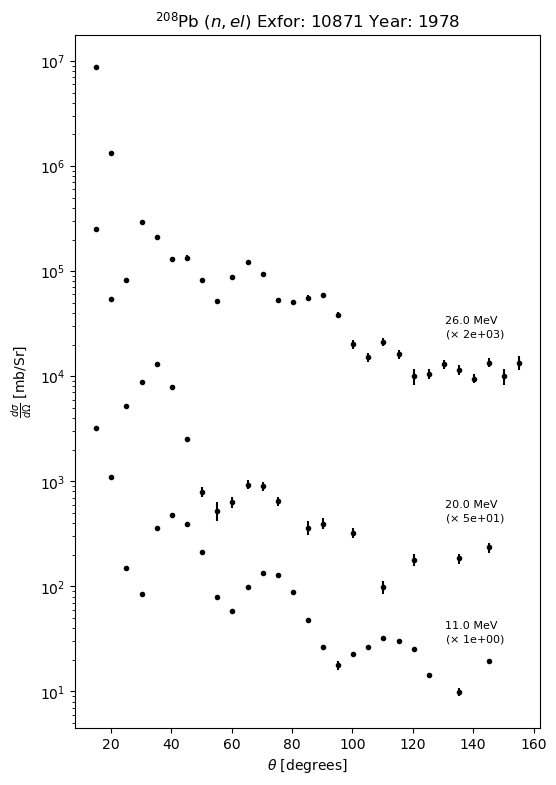

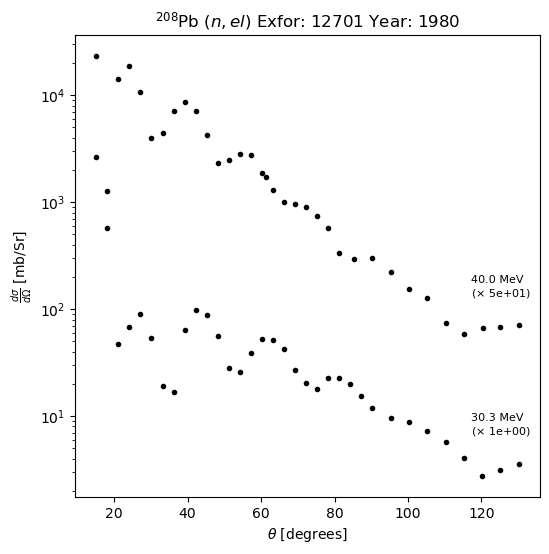

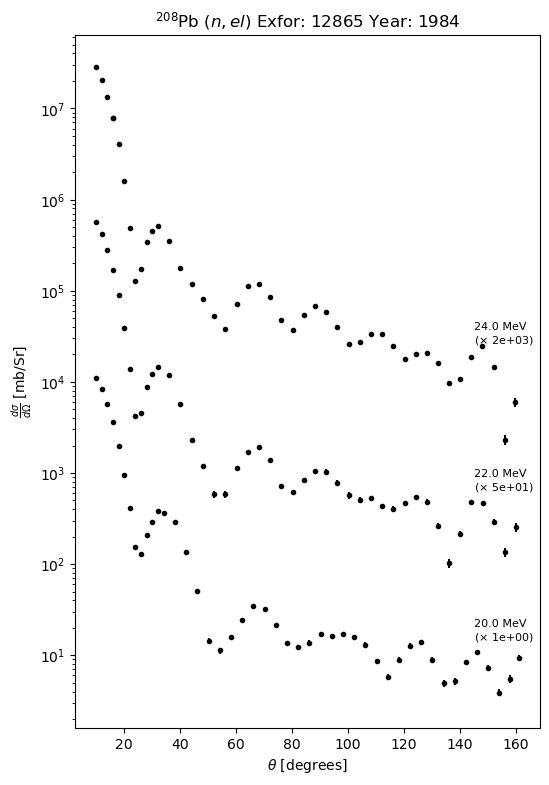

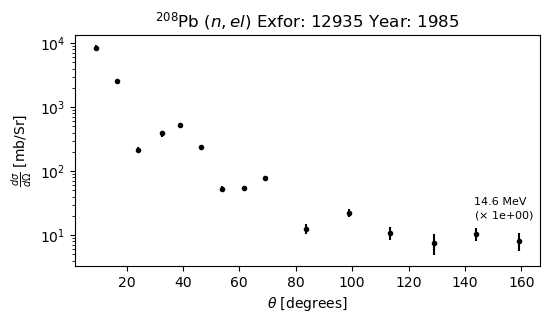

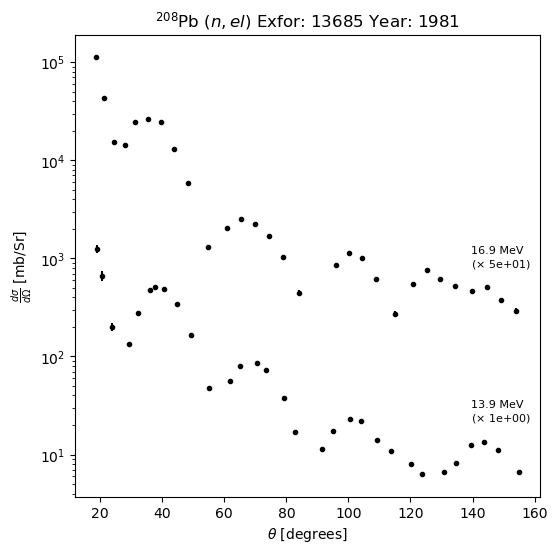

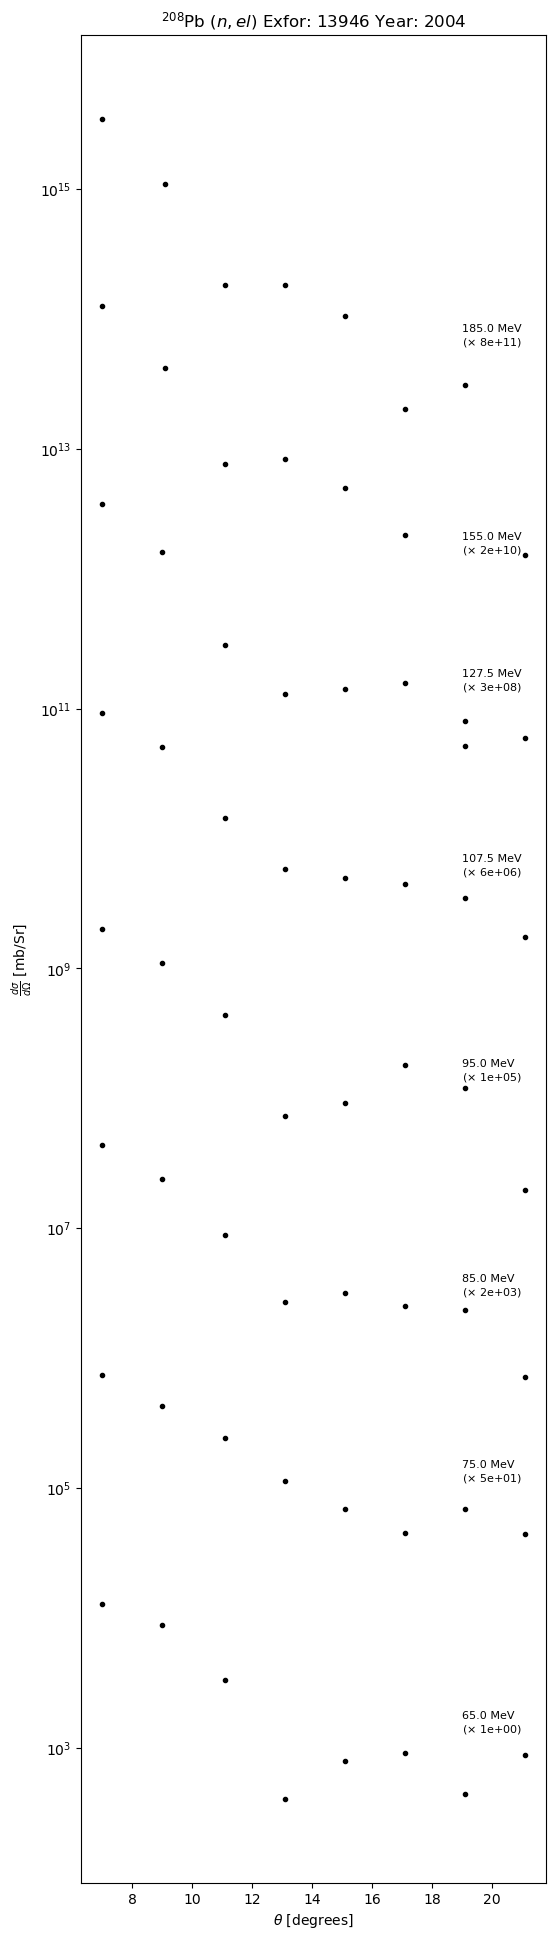

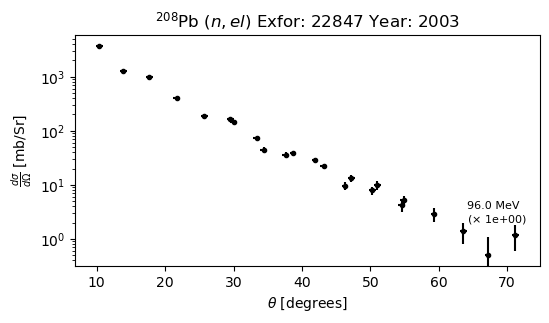

In [16]:
for entry, data in all_entries_nn.items():
    
    N = len(data.measurements)
    fig, ax = plt.subplots(1, 1, figsize=(6, 3*N))

    data.plot_experiment(
        ax,
        xlim=None,
        offsets=50,
        label_energy_err=False,
        label_hloc_deg=np.max(data.measurements[0].data[0,:])*0.9,
    )
    yr = data.meta["year"]
    ax.set_title(f"{data.fancy_label} Exfor: {entry} Year: {yr}")

In [17]:
from periodictable import elements
A,Z = target
with open(f"{elements[Z]}{A}_n_elastic.pkl" , "wb") as f:
    pickle.dump(all_entries_nn, f)

with open(f"{elements[Z]}{A}_p_elastic.pkl" , "wb") as f:
    pickle.dump( {"xs" : all_entries_pp , "ratio" : all_entries_pp_ruth}, f)